In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
model = LinearRegression()
df_path = "data/raw/test_scores.csv"
income = pd.read_csv(df_path)
data=income.drop(['school','school_setting','school_type','classroom','teaching_method','student_id','gender','lunch'], axis=1)
data.head()


,n_student,pretest,posttest
0,20.0,62.0,72.0
1,20.0,66.0,79.0
2,20.0,64.0,76.0
3,20.0,61.0,77.0
4,20.0,64.0,76.0


In [5]:

income.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


Linear regression R2 score: 0.9110638029711682
prediction: [ 68.18928078  78.6784812   77.4814593   70.80651358  60.84481357
  75.14826868  77.90752258  54.41332607  60.84481357  60.84481357
  66.28215343  62.46789874  72.28757766  97.50629646  52.36417763
  44.16758388  51.79609327  75.57433196  78.00895971  61.79837724
  55.61034797  60.56077139  60.84481357  49.88896592  66.38359056
  83.34486244  65.18656867  80.05810815  91.21683006  70.09640813
  86.1649695   75.43231087  71.29343003  73.8092257   67.33715424
  56.74651669  51.26859287  56.36103738  45.40518973  47.0282749
  64.0909839   92.55587304  57.51747531  82.63475699  85.1099687
  69.24428159  68.08784365  86.87507496  78.39443902  42.44306158
  62.18385656  75.04683155  49.36146552  83.73034175  54.83938934
  87.82863863  54.41332607  67.9052386   70.62390853  94.46300039
  68.04725969  86.30699059  63.66492063  55.50891084  63.13742023
  71.15140894  77.05539603  56.32045342  40.35332918  45.40518973
  94.07752108  76.6

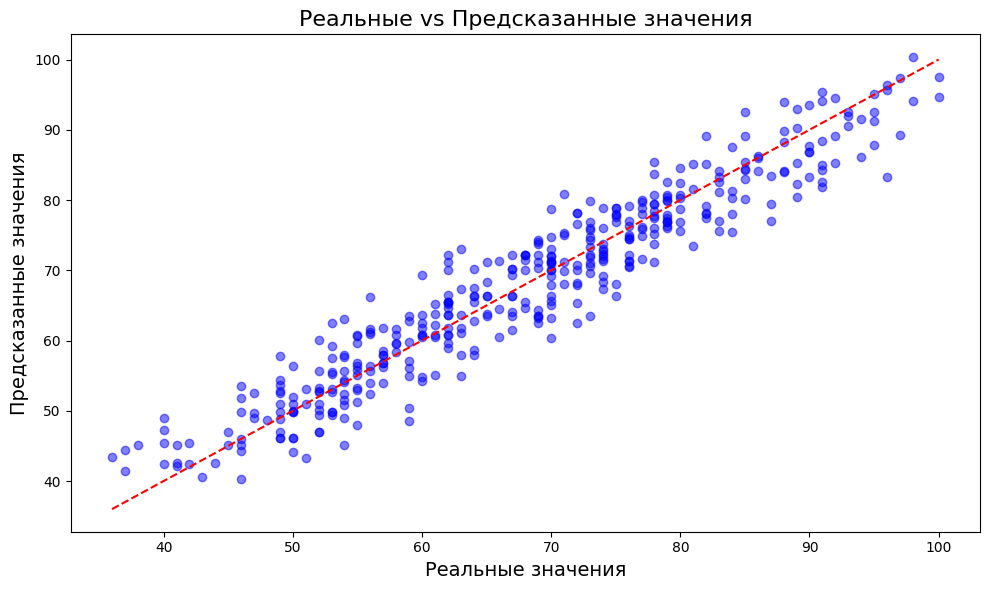

In [9]:

X = data.drop(columns=['posttest'])
y = data['posttest']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
pred_res = model.predict(X_test)
r2 = r2_score(y_test, pred_res)

print(f'Linear regression R2 score: {r2}')

print(f'prediction: {pred_res}')
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred_res, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Реальные vs Предсказанные значения', fontsize=16)
plt.xlabel('Реальные значения', fontsize=14)
plt.ylabel('Предсказанные значения', fontsize=14)
plt.tight_layout()
plt.show()